In [ ]:
## Lab | Cleaning categorical data
## For this lab, we will be using the dataset in the Customer Analysis Business Case. 
## This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. 
## You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

## Instructions?
    ## Import the necessary libraries if you are starting a new notebook.
    ## Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
    ## What should we do with the customer_id column?
    ## Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
        ##  numerical_df = customer_df.select_dtypes()
        ## categorical_df = customer_df.select_dtypes()
    ## Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
    ## For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [2]:
## Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [16]:
## Setting 'cusotmer_id' as index for our data
customer_df.set_index('Customer', inplace=True)
customer_df.head()

KeyError: "None of ['Customer'] are in the columns"

In [17]:
customer_df.info()  ## We can confirm that the column "Consumer" was put out

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [18]:
## Load the continuous and discrete variables into numericals_df and categorical_df variables

numerical_df = customer_df.select_dtypes(include=['float64', 'int64'])
categorical_df = customer_df.select_dtypes(include=['object'])


In [19]:
numerical_df.shape


(9134, 8)

In [20]:
categorical_df.shape

(9134, 15)

In [27]:
display(numerical_df)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [28]:
display(categorical_df)

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [ ]:
## Plot every categorical variable. each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

numerical_target = 'Customer Lifetime Value'

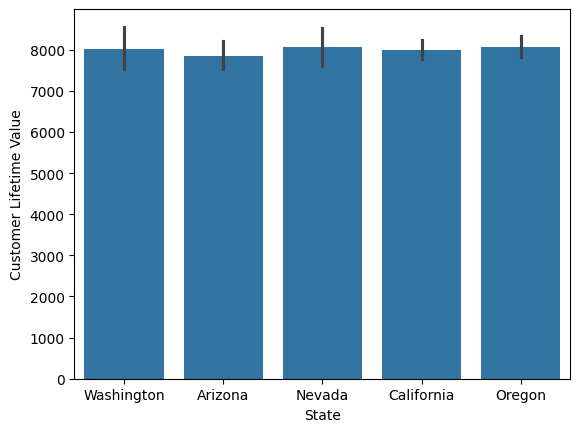

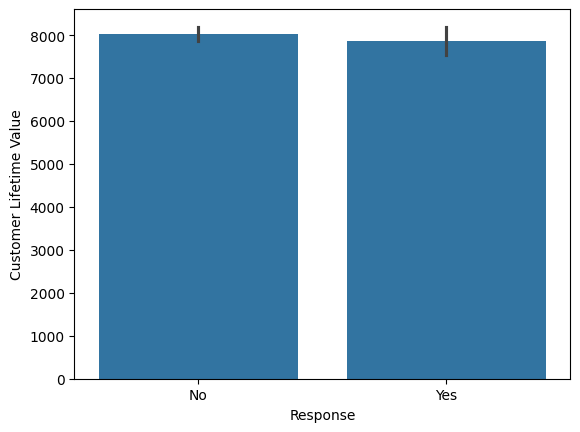

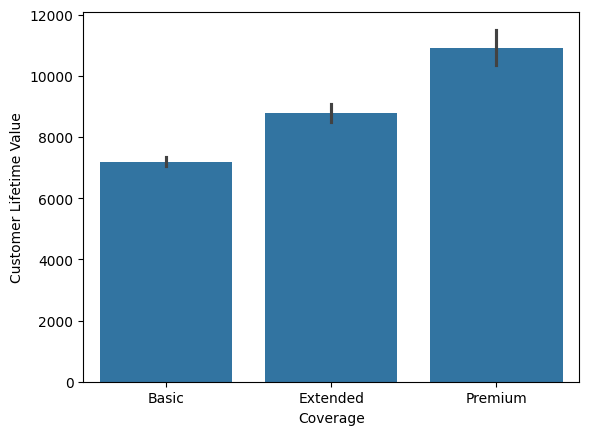

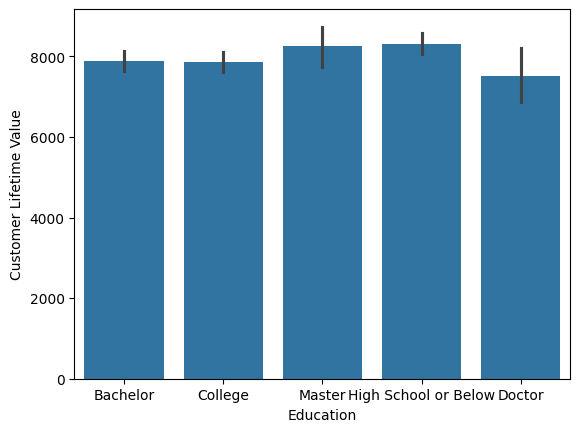

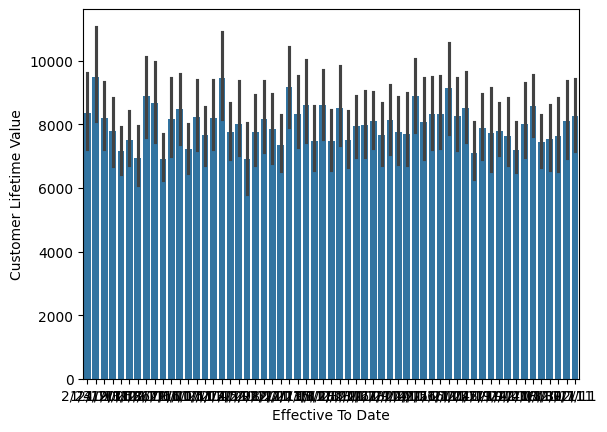

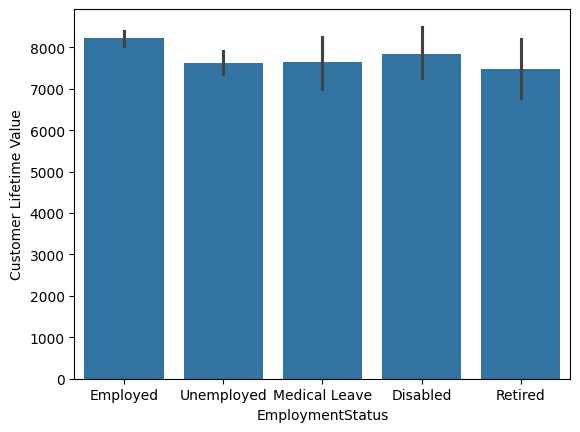

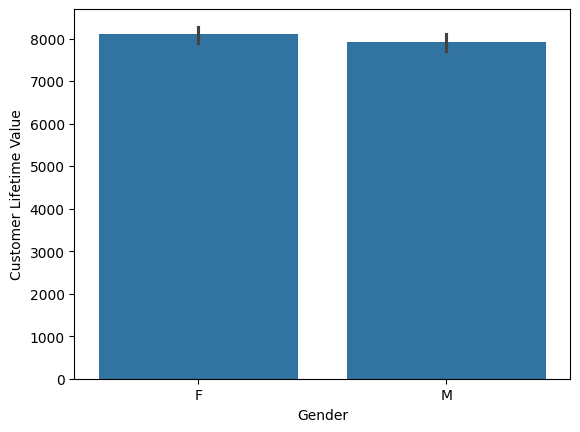

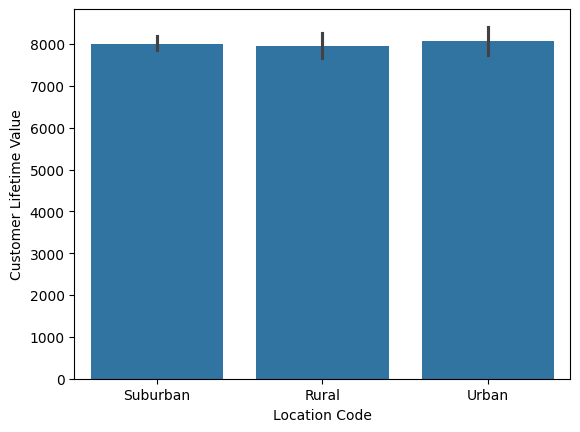

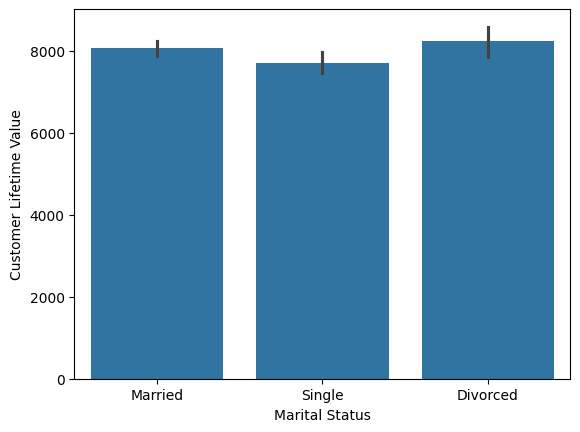

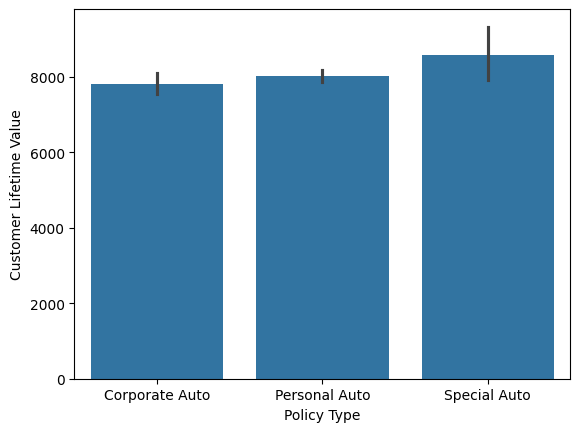

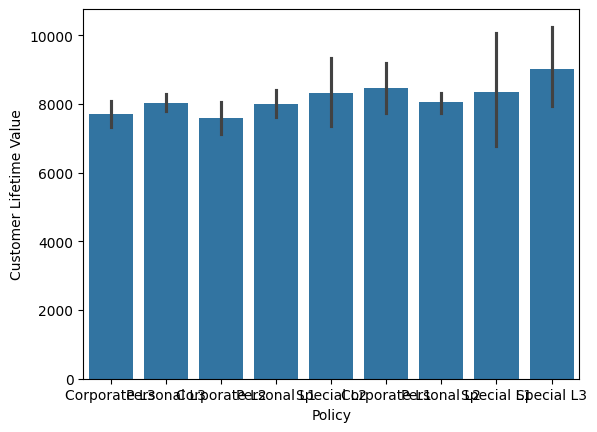

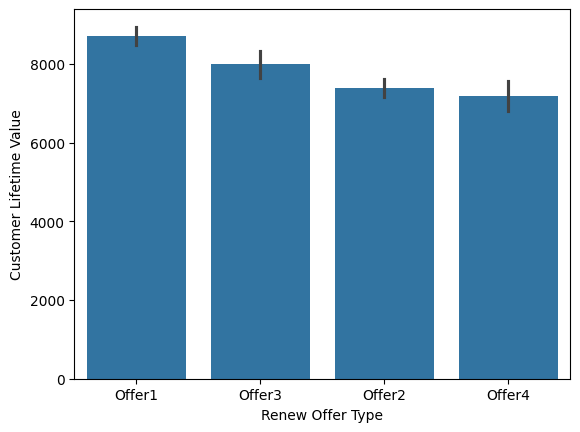

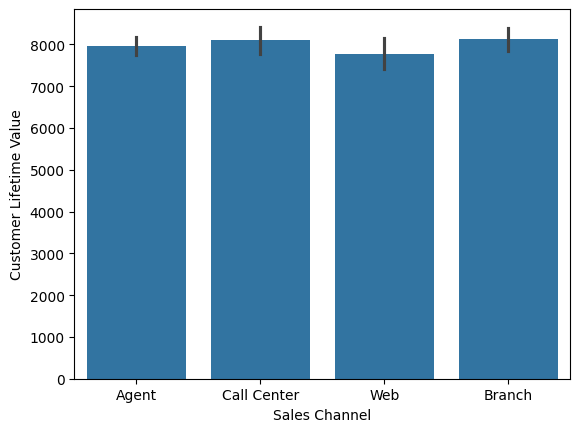

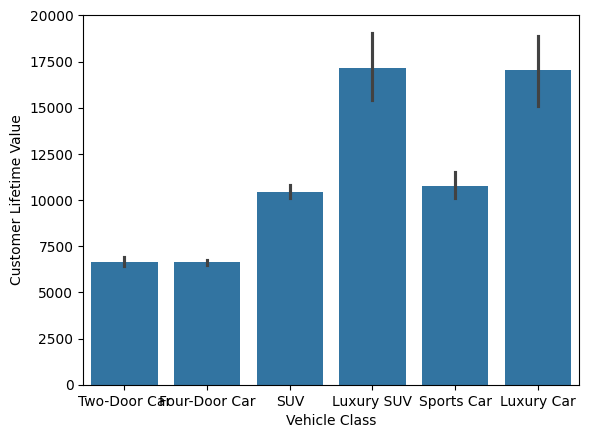

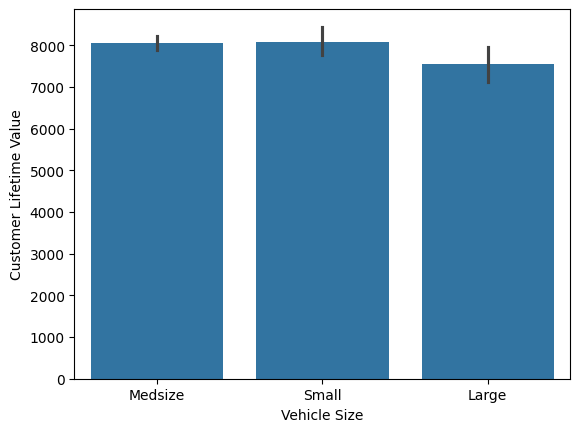

In [21]:
for col in categorical_df:
    sns.barplot(data=customer_df, x=col, y="Customer Lifetime Value")
    plt.show()

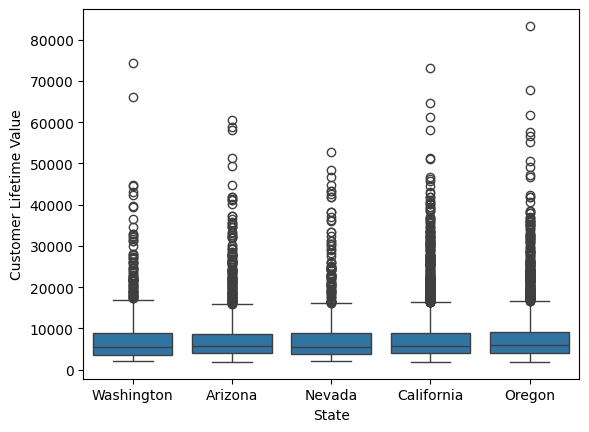

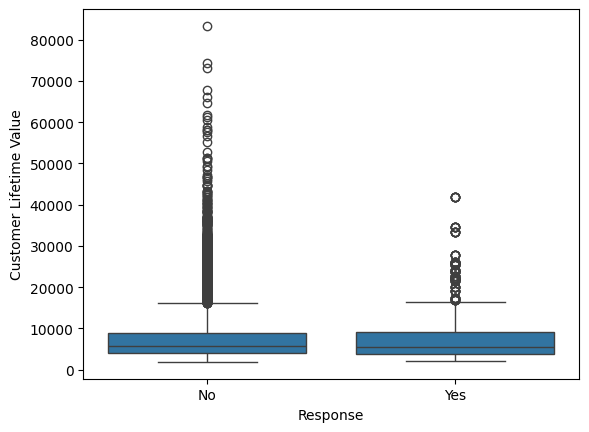

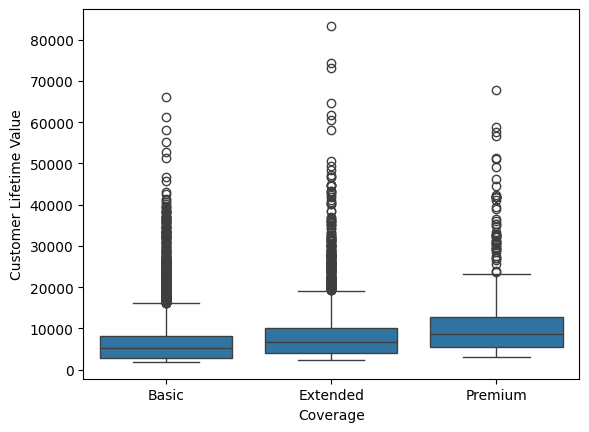

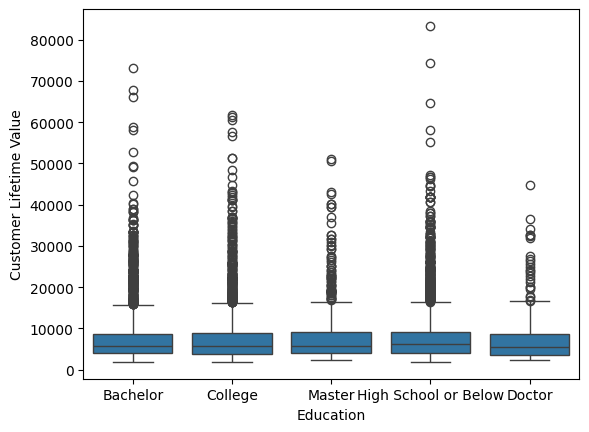

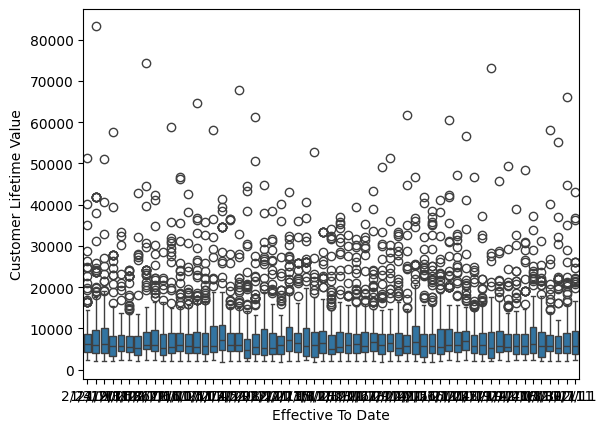

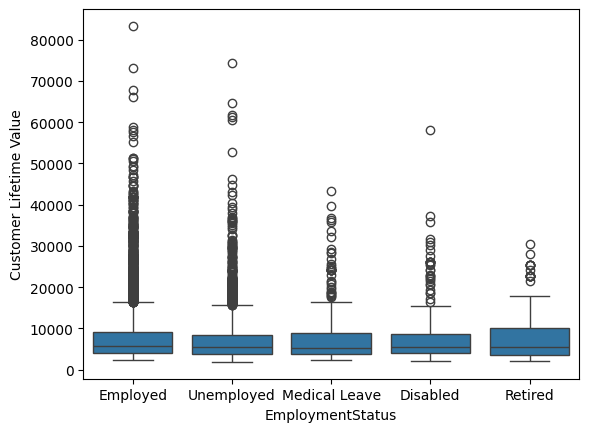

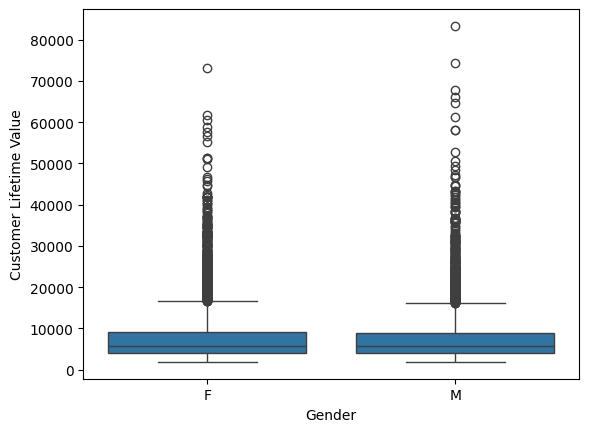

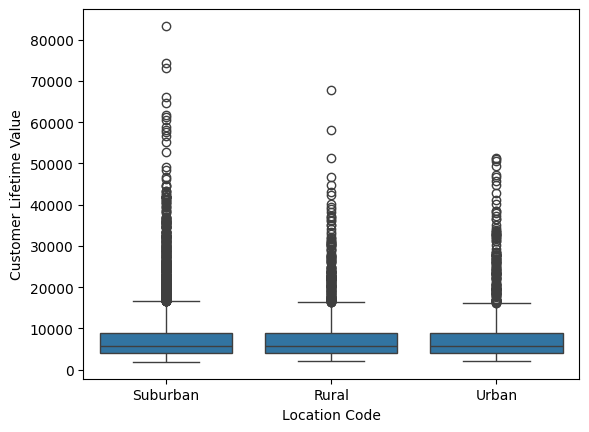

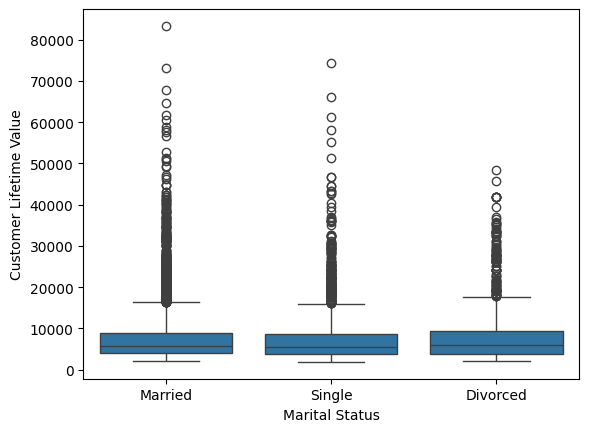

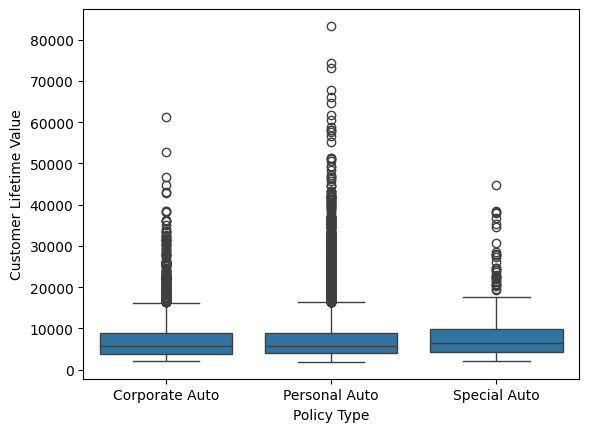

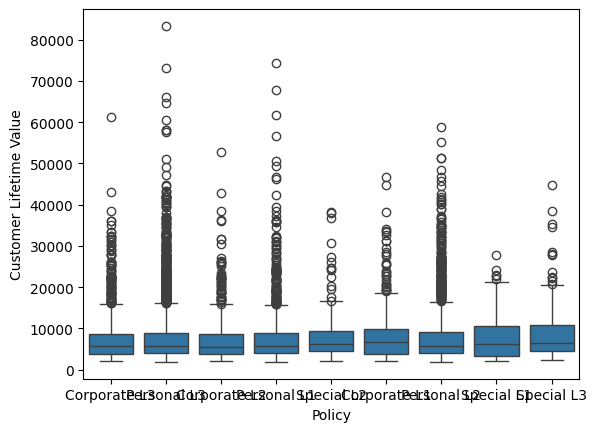

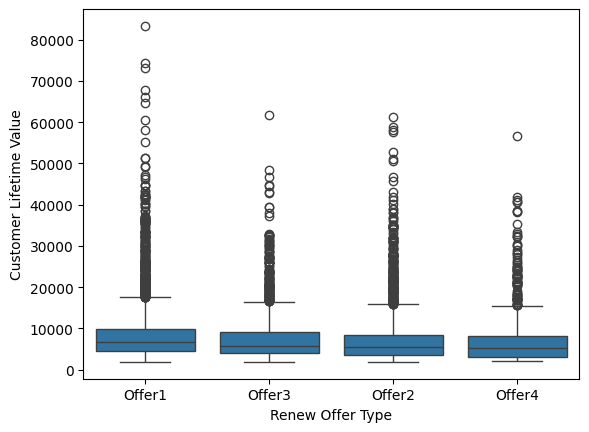

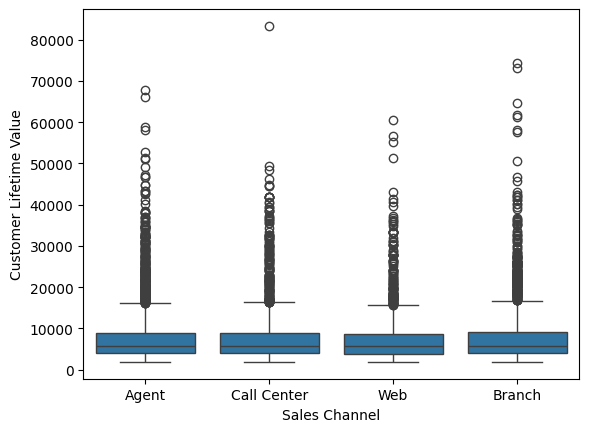

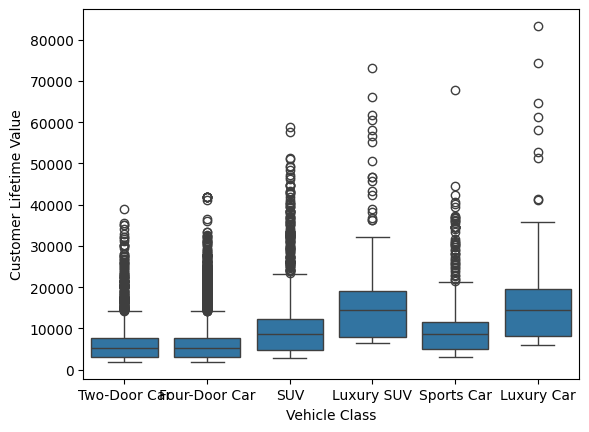

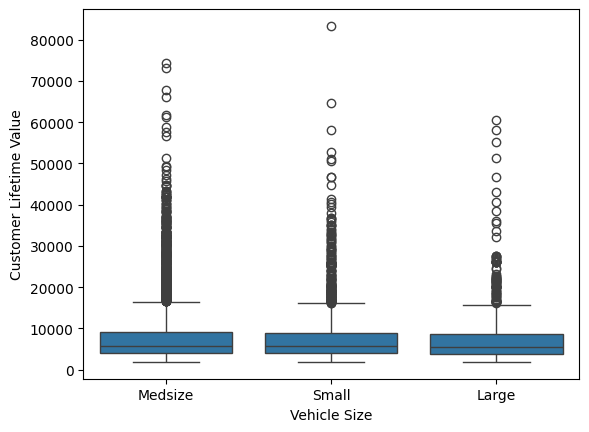

In [22]:
for col in categorical_df:
    sns.boxplot(data=customer_df, x=col, y="Customer Lifetime Value")
    plt.show()

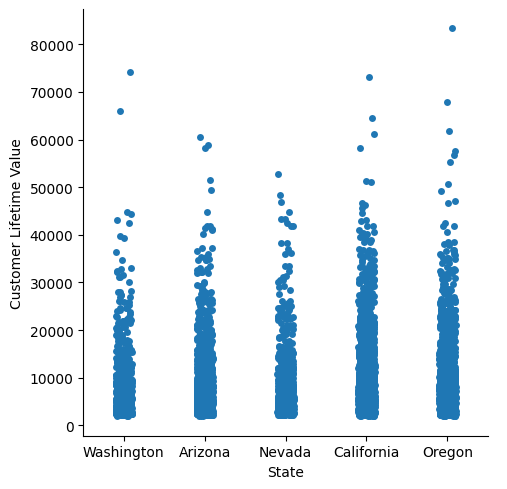

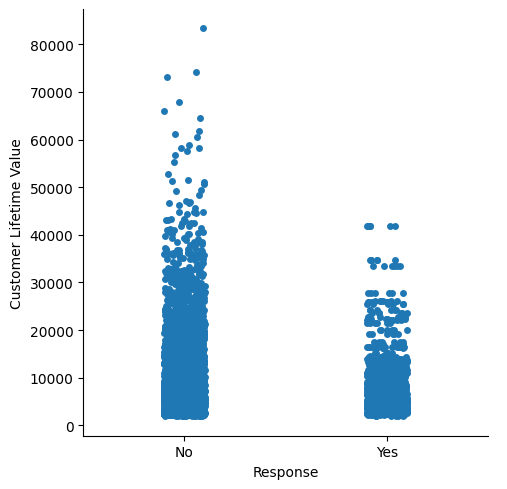

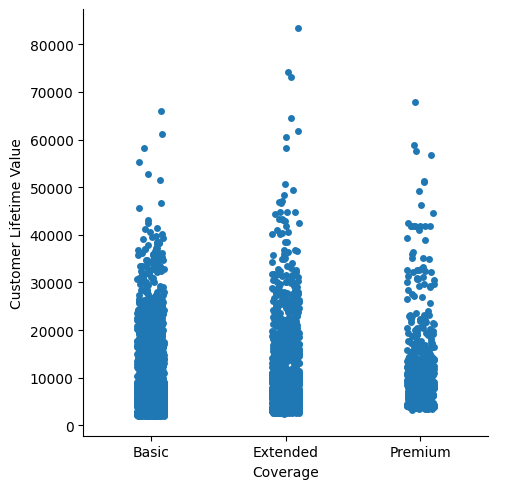

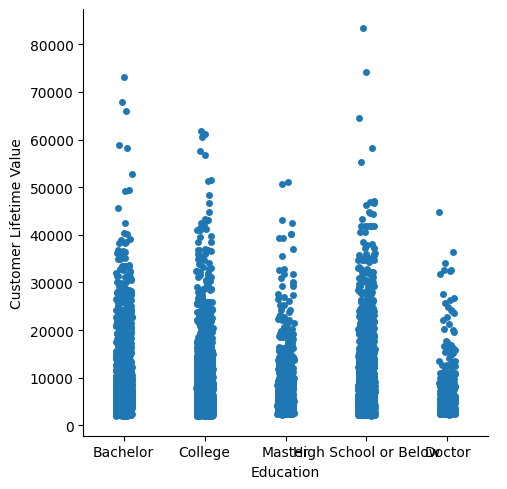

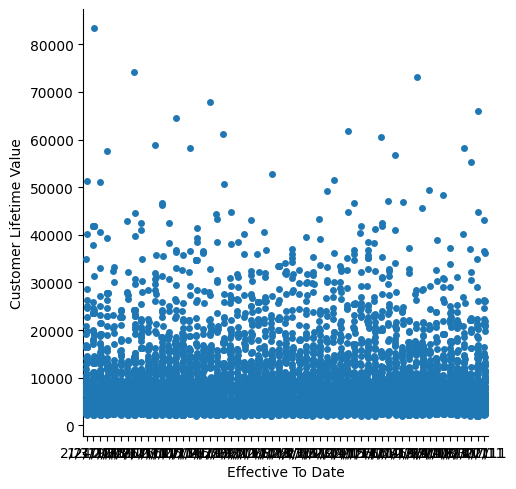

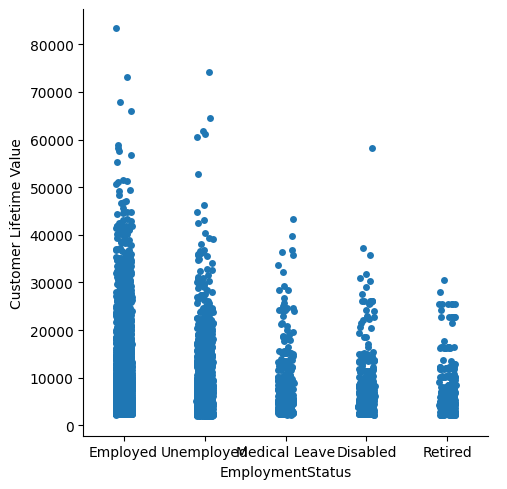

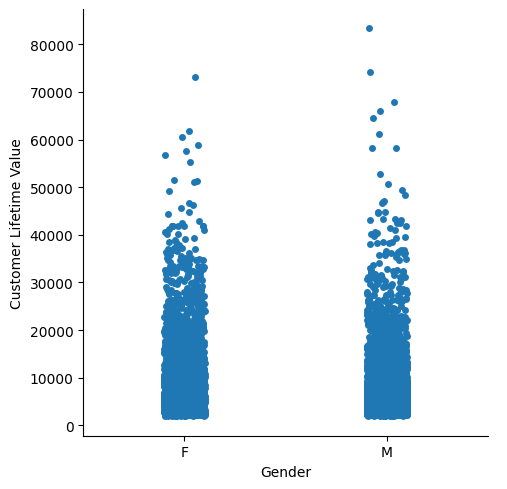

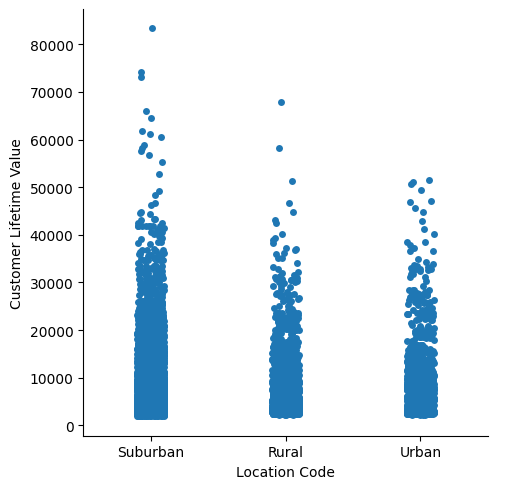

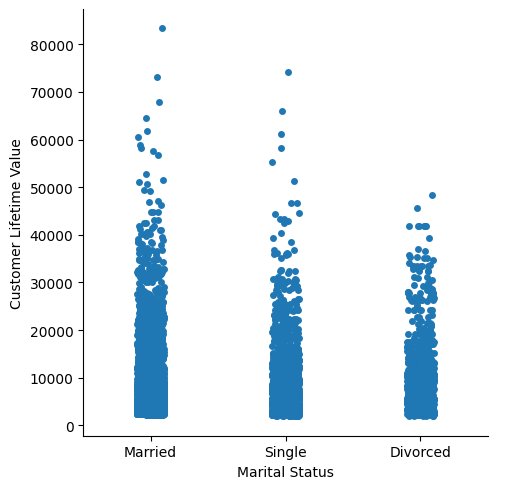

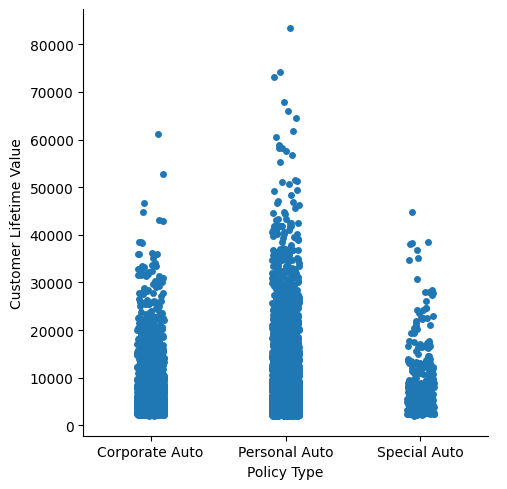

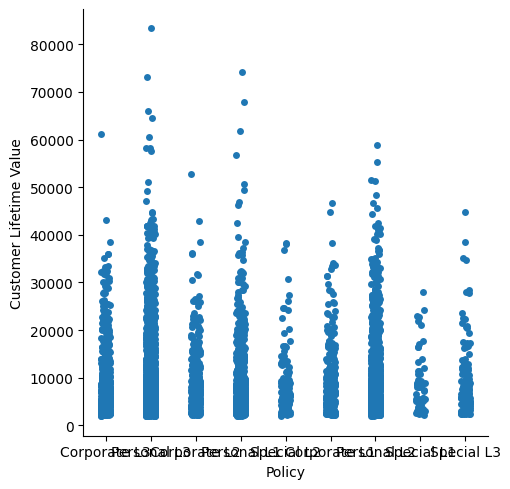

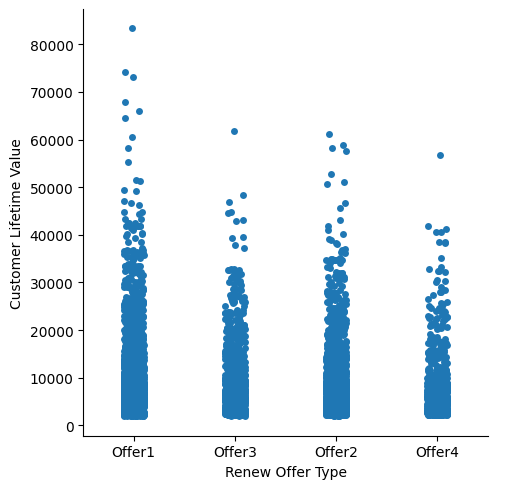

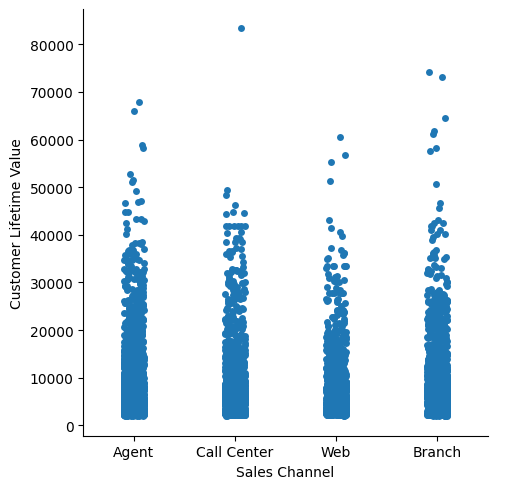

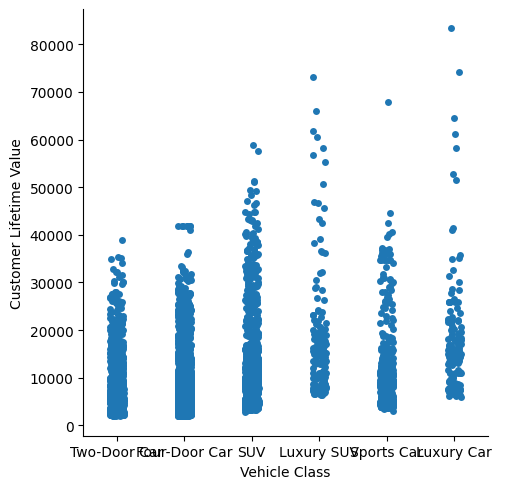

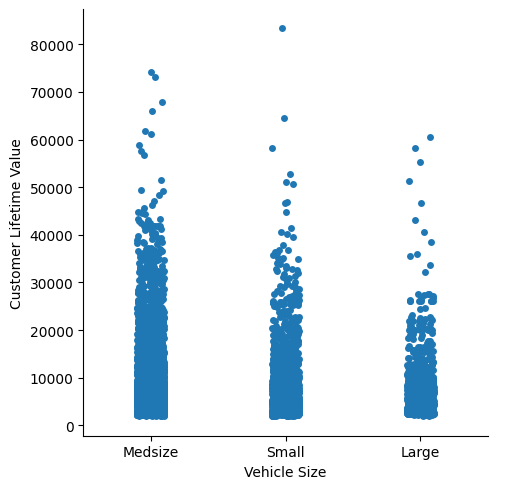

In [41]:
for col in categorical_df:
    sns.catplot(data=customer_df, x=col, y="Customer Lifetime Value")
    plt.show()

In [36]:
display(categorical_df)

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [ ]:
## For the categorical data, check if there is any data cleaning that need to perform. 

In [29]:
customer_df.value_counts()

State       Customer Lifetime Value  Response  Coverage  Education             Effective To Date  EmploymentStatus  Gender  Income  Location Code  Marital Status  Monthly Premium Auto  Months Since Last Claim  Months Since Policy Inception  Number of Open Complaints  Number of Policies  Policy Type     Policy        Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  Vehicle Size
Arizona     5757.442258              Yes       Basic     Master                1/31/11            Employed          M       88997   Rural          Divorced        72                    9                        71                             0                          3                   Personal Auto   Personal L3   Offer2            Branch         174.041566          Four-Door Car  Small           4
California  14435.673650             Yes       Premium   Master                1/26/11            Employed          M       60880   Rural          Married         119                   25          

In [34]:
categorical_df.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [43]:
## Changing the 'effective_to_date' column to datetime format
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])   

C:\Users\rainm\AppData\Local\Temp\ipykernel_20300\1742085886.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])


In [45]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State                          9134 non-null   object        
 1   Customer Lifetime Value        9134 non-null   float64       
 2   Response                       9134 non-null   object        
 3   Coverage                       9134 non-null   object        
 4   Education                      9134 non-null   object        
 5   Effective To Date              9134 non-null   datetime64[ns]
 6   EmploymentStatus               9134 non-null   object        
 7   Gender                         9134 non-null   object        
 8   Income                         9134 non-null   int64         
 9   Location Code                  9134 non-null   object        
 10  Marital Status                 9134 non-null   object        
 11  Monthly Premi

In [46]:
# List of categorical variables
categorical_variables = ['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
                         'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
                         'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
                         'Vehicle Class', 'Vehicle Size']

# Loop through each categorical variable and print the value counts
for col in categorical_variables:
    print(f'Value counts for {col}:')
    print(customer_df[col].value_counts())
    print('\n')

Value counts for State:
State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64


Value counts for Response:
Response
No     7826
Yes    1308
Name: count, dtype: int64


Value counts for Coverage:
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64


Value counts for Education:
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64


Value counts for Effective To Date:
Effective To Date
2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2